## Chapter 14: Plotting in Makie

### 14.1: Basic Plotting



In [1]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

#### Scatter Plot

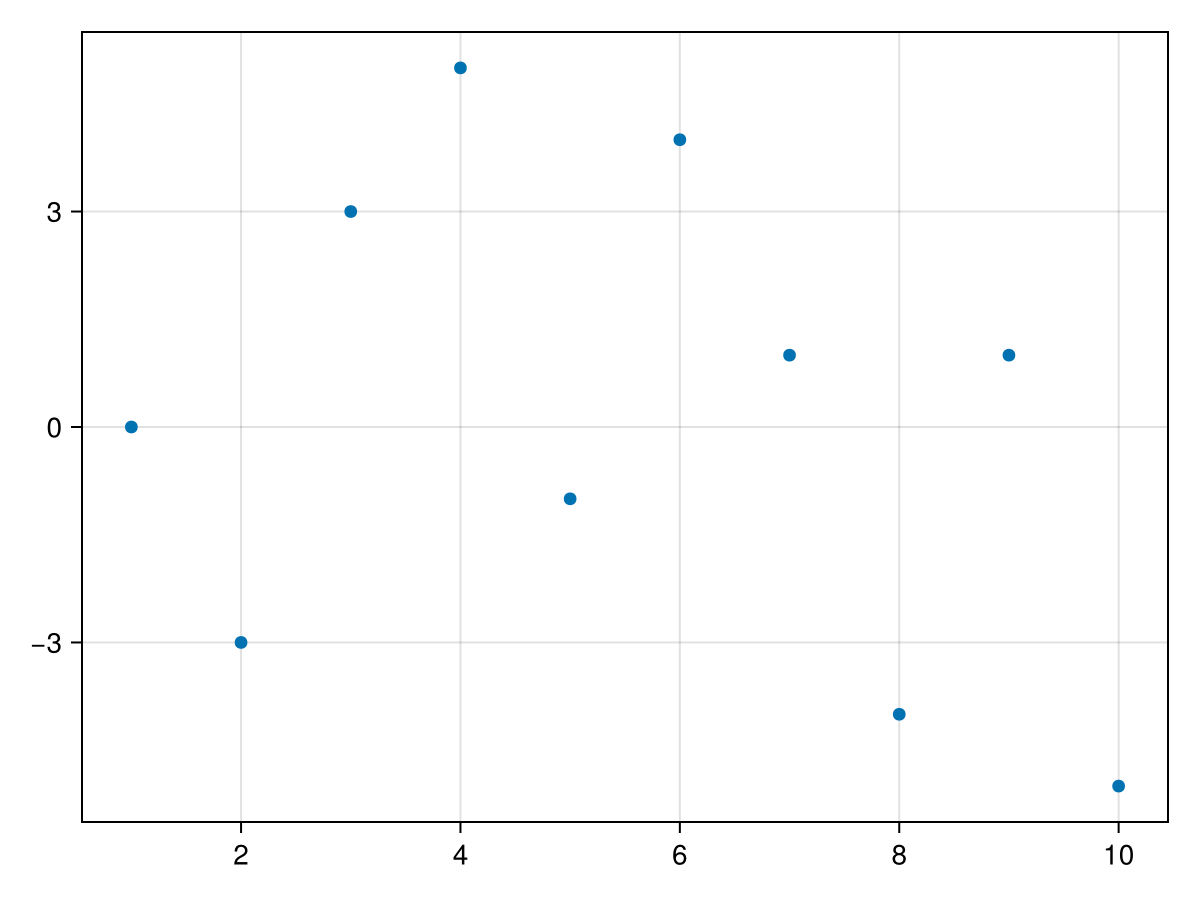

In [2]:
x = 1:10
y = rand(-5:5,10)
scatter(x,y)

### Line Plot

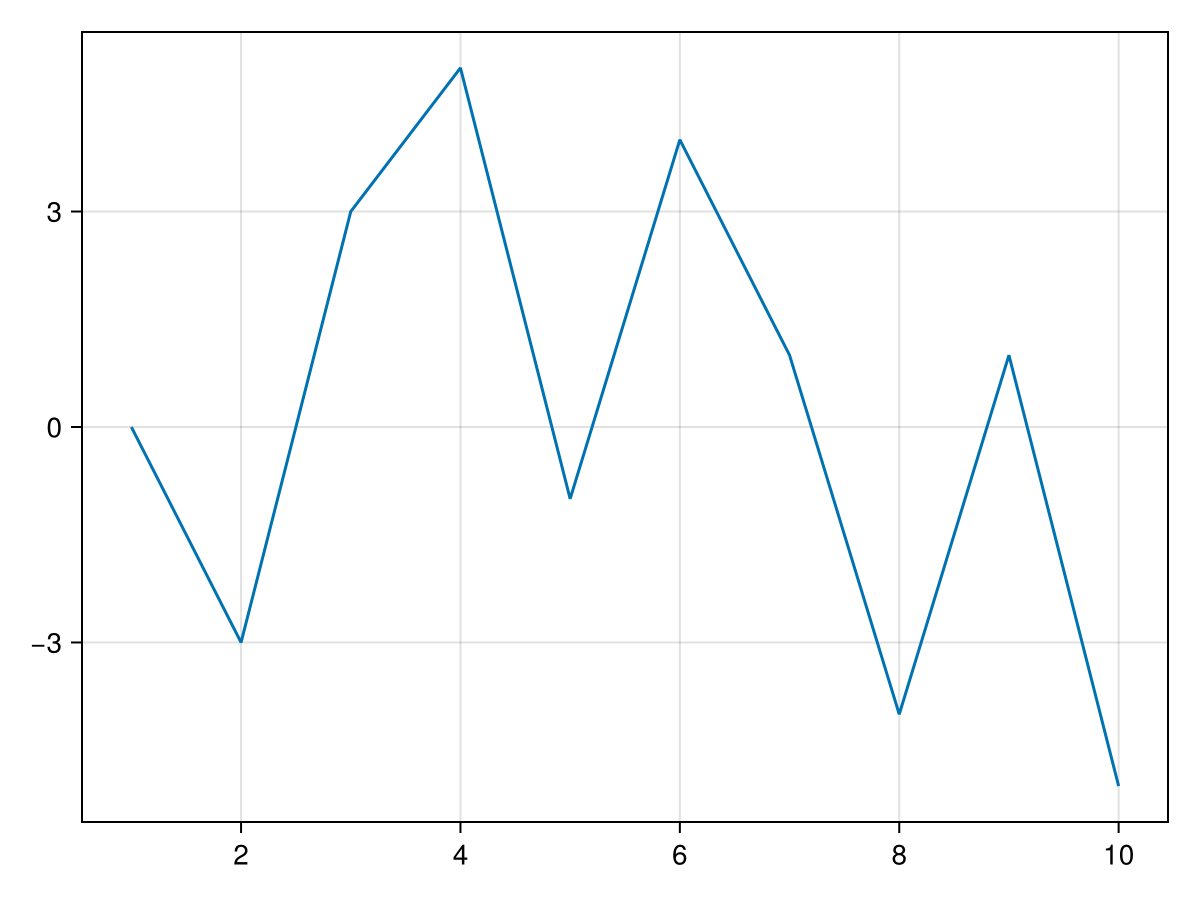

In [3]:
lines(x,y)

### Function Plot

You can make a line plot with a lot of values

In [5]:
x=-2:0.01:2
y = x.^2;

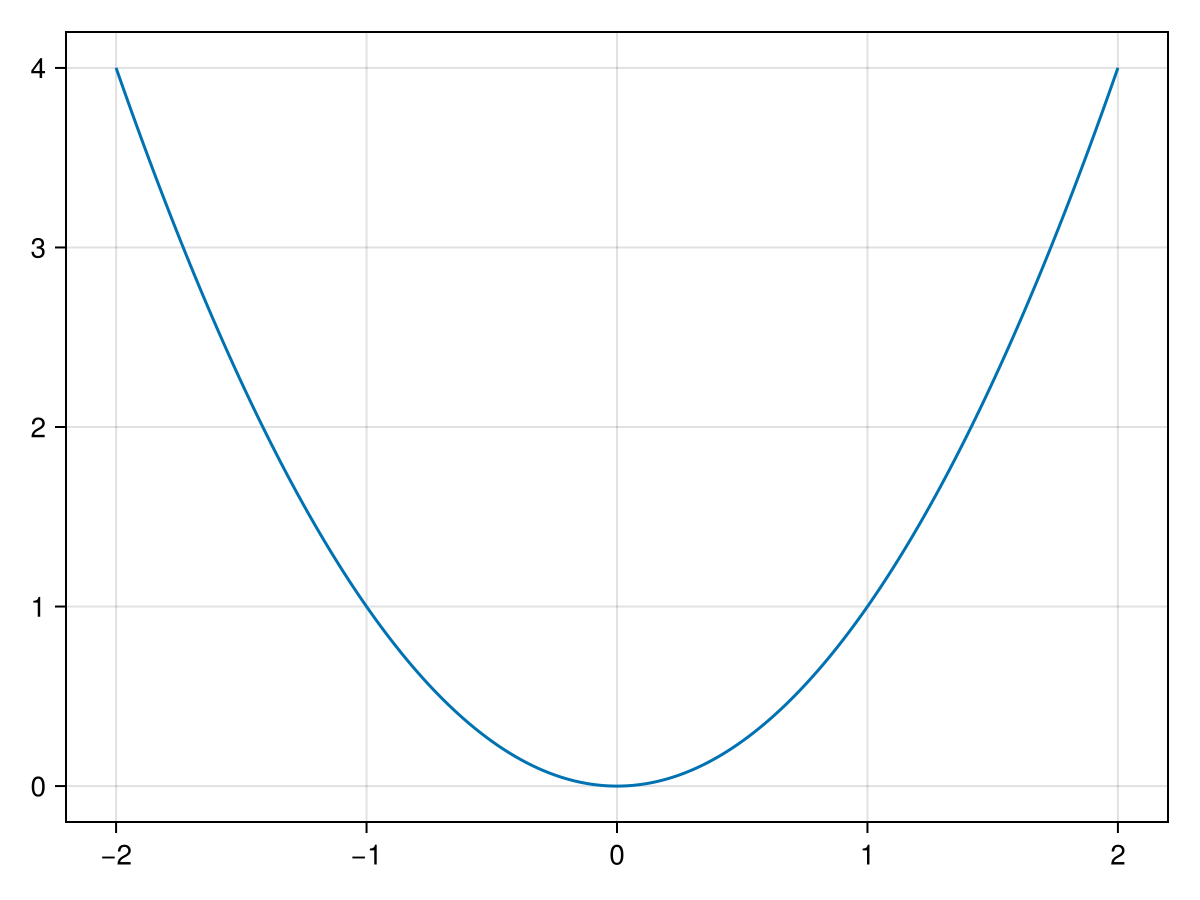

In [6]:
lines(x,y)

Or instead apply a function to a plotting domain

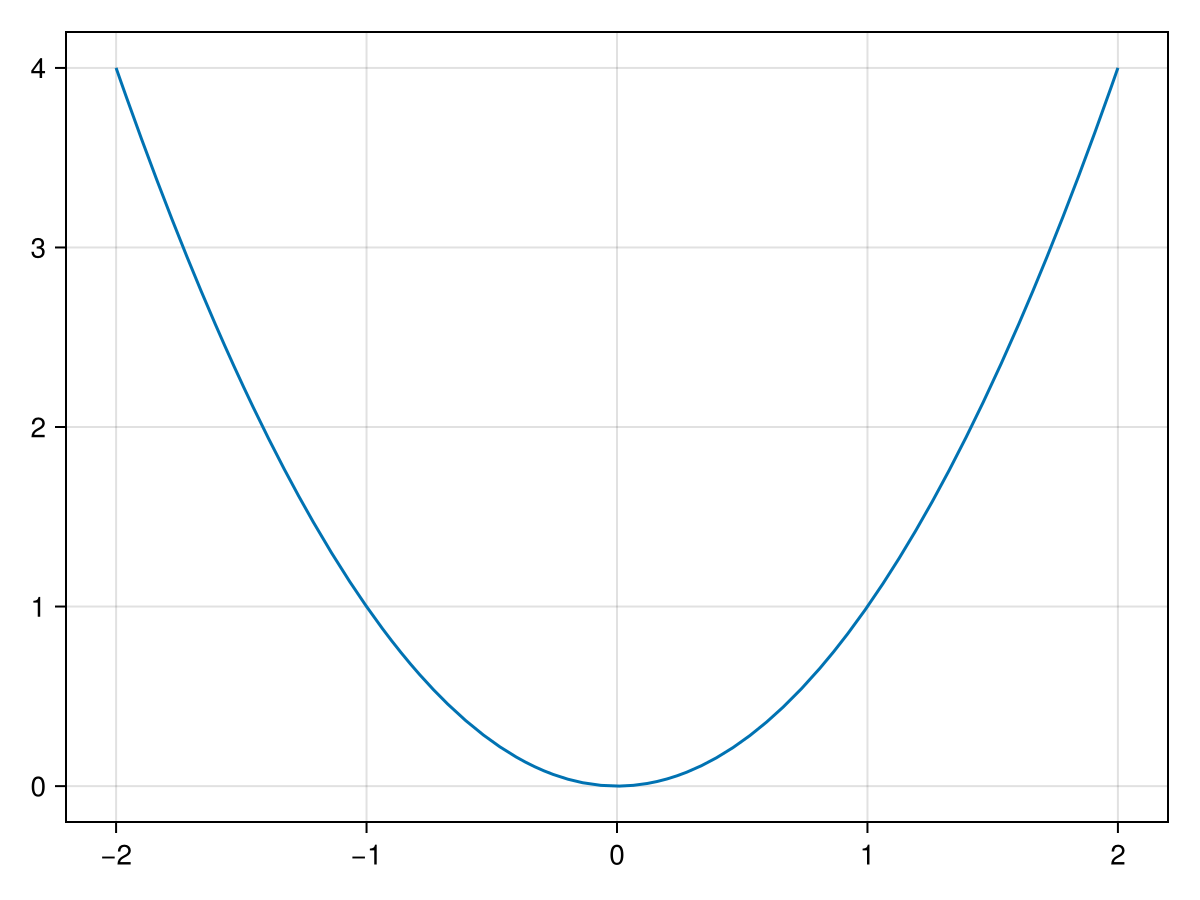

In [7]:
lines(-2..2,x->x^2)

In [8]:
typeof(-2..2)

ClosedInterval{Int64} (alias for IntervalSets.Interval{:closed, :closed, Int64})

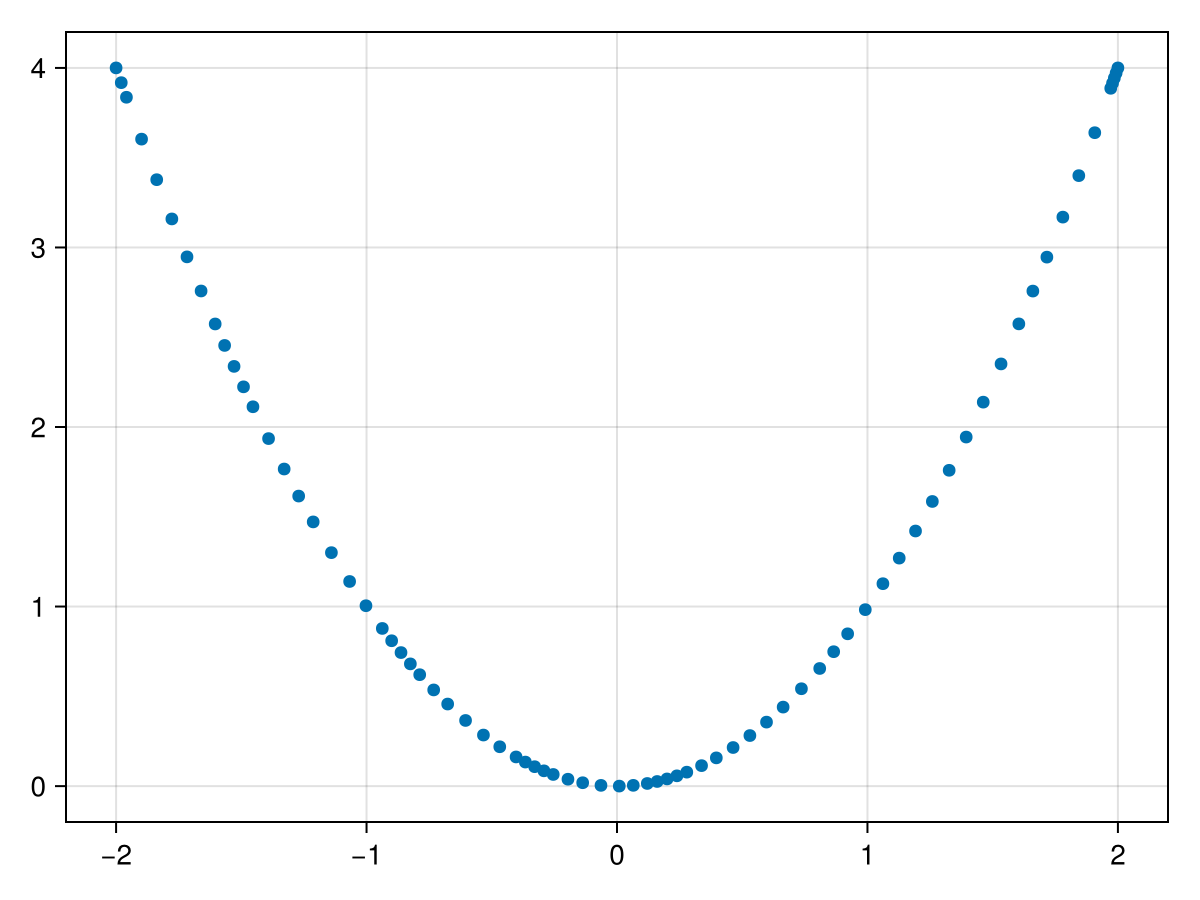

In [9]:
scatter(-2..2,x->x^2)

### 14.2 Figures and Grid layout of Axes

This section shows how to build a plot from various pieces (axes) as well as apply attributes to axes.

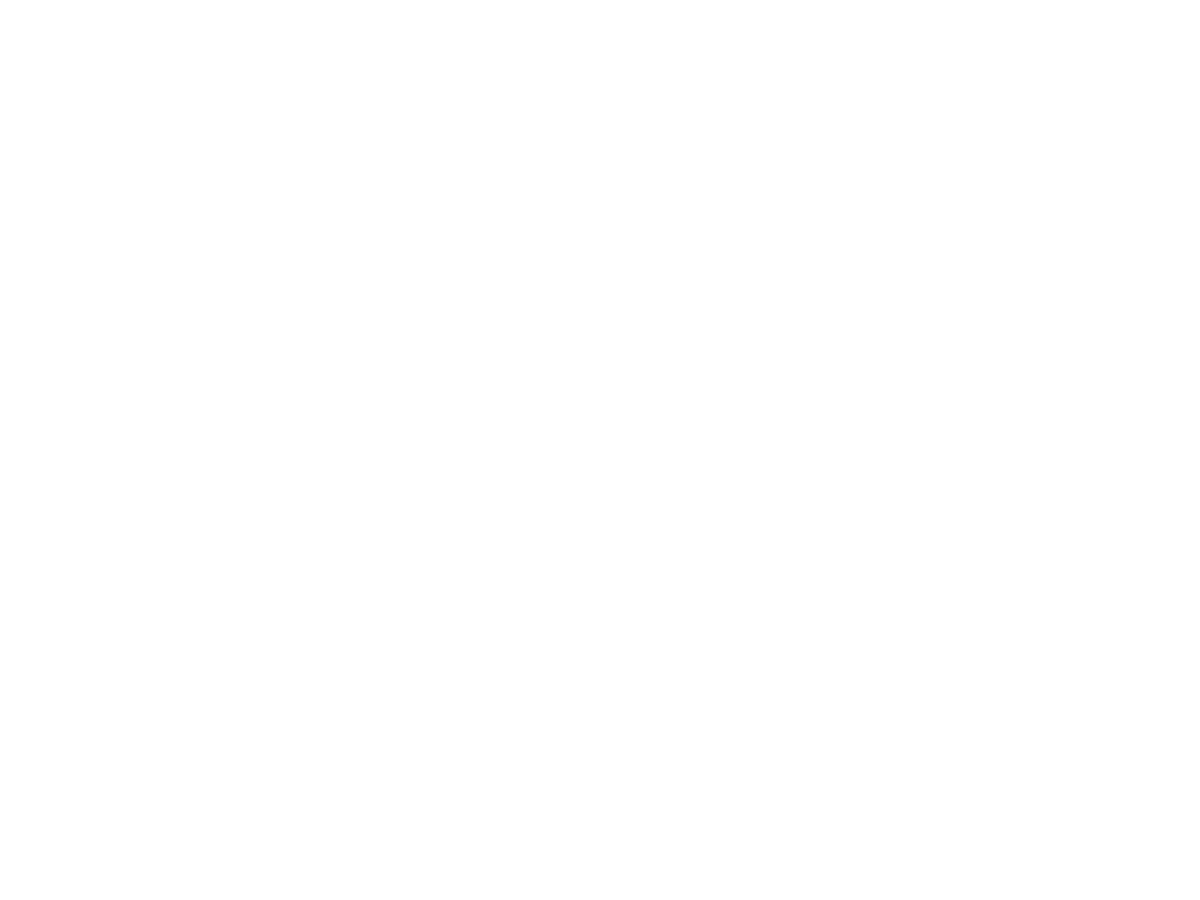

In [10]:
fig = Figure()

Now put an axis on the figure

In [11]:
ax = Axis(fig[1,1])

Axis with 0 plots:


Nothing happened but if we show the figure again...

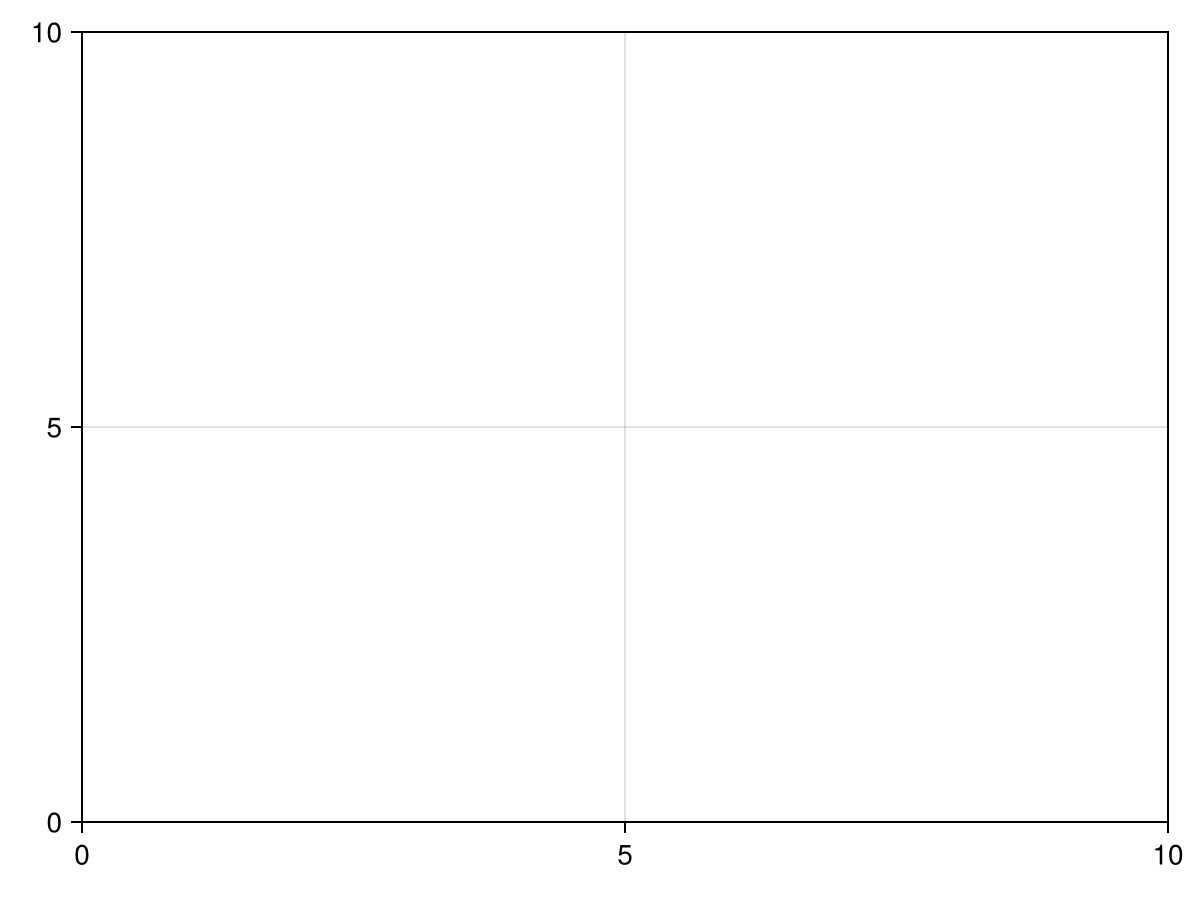

In [12]:
fig

Build a Figure with a 2 by 2 grid of axes

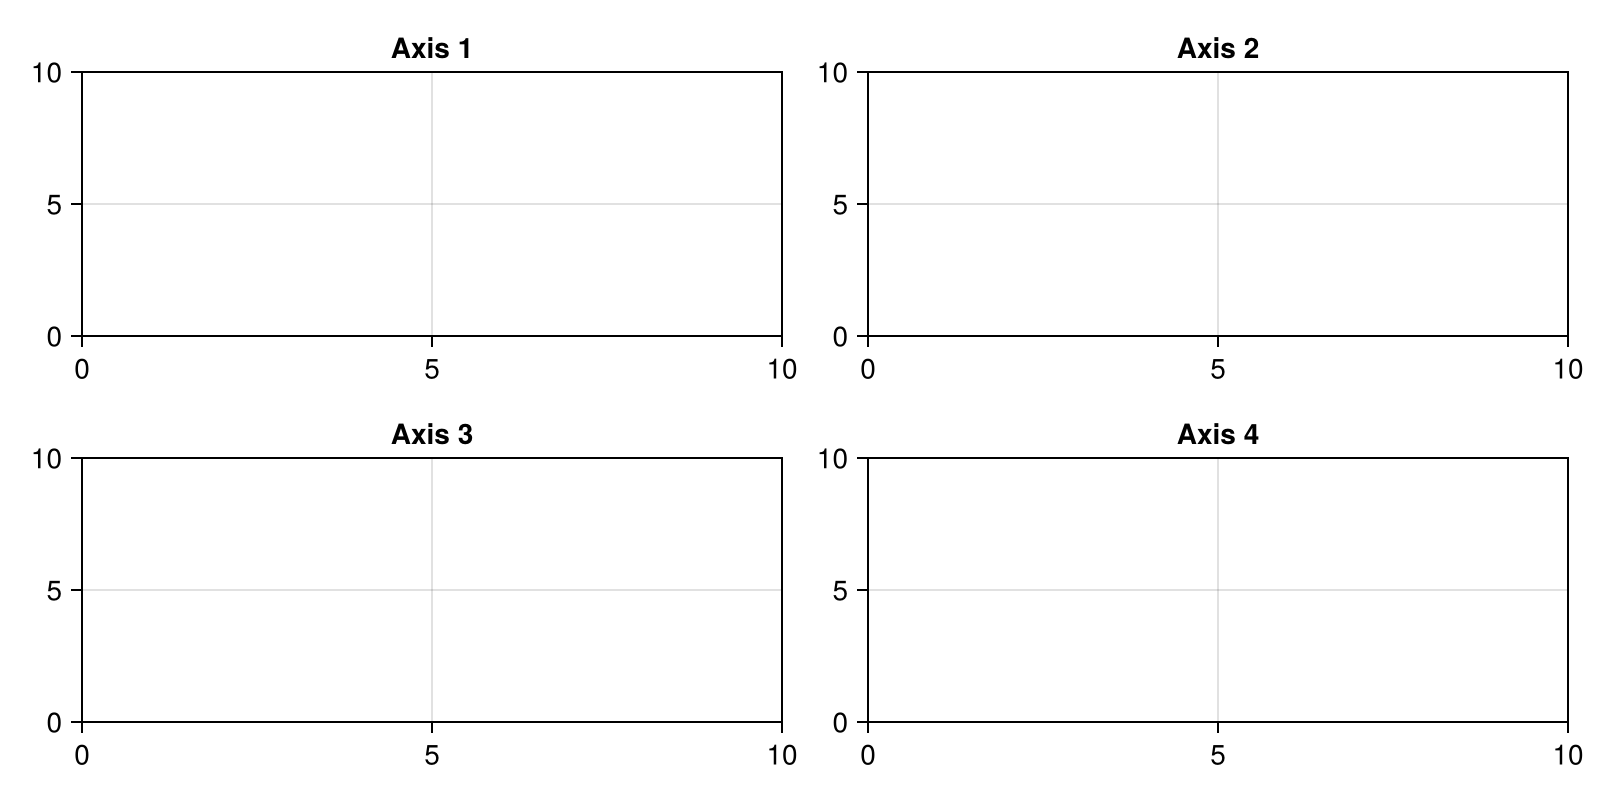

In [16]:
fig = Figure(size=(800,400))
ax1 = Axis(fig[1,1], title="Axis 1")
ax2 = Axis(fig[1,2], title="Axis 2")
ax3 = Axis(fig[2,1], title="Axis 3")
ax4 = Axis(fig[2,2], title="Axis 4")
fig

Build a Figure with a axis on the top half and 3 axes on the bottom.

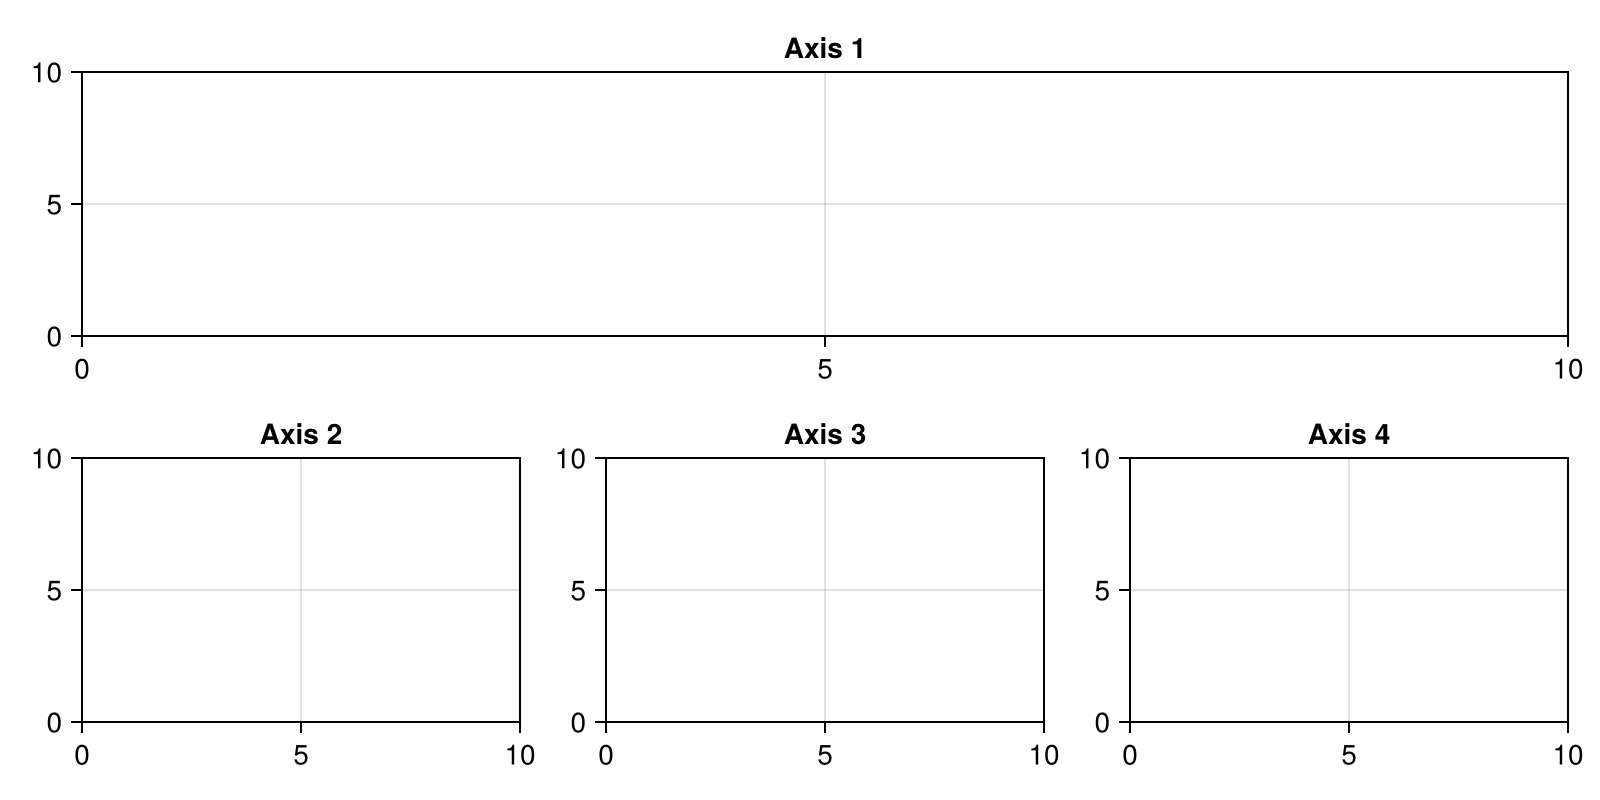

In [21]:
fig = Figure(size=(800,400))
ax1 = Axis(fig[1,1][1,1], title="Axis 1")
ax2 = Axis(fig[2,1][1,1], title="Axis 2")
ax3 = Axis(fig[2,1][1,2], title="Axis 3")
ax4 = Axis(fig[2,1][1,3], title="Axis 4")
fig

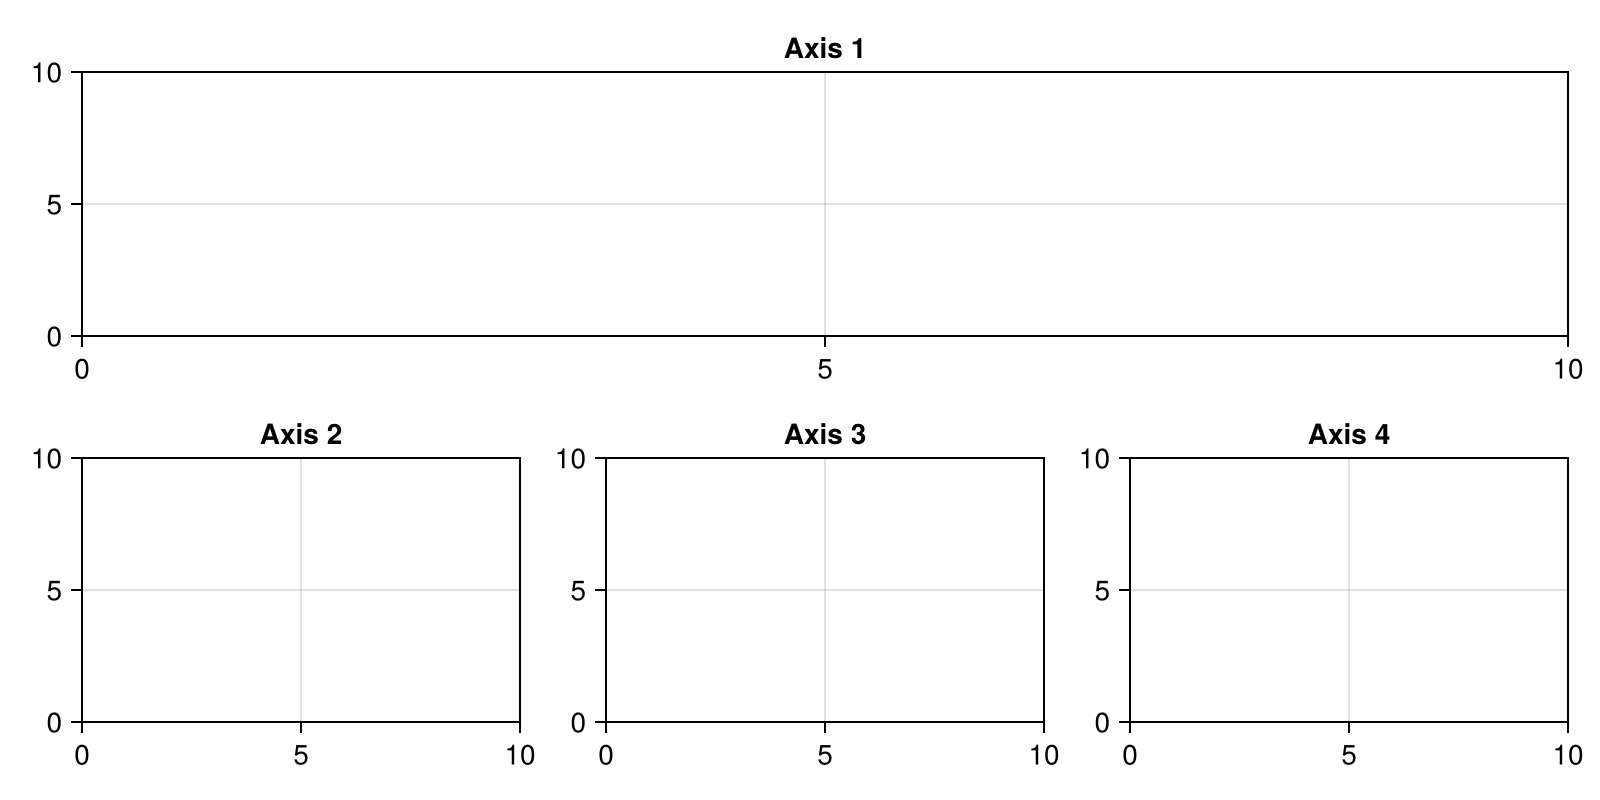

In [22]:
fig = Figure(size=(800,400))
ax1 = Axis(fig[1,1:3], title="Axis 1")
ax2 = Axis(fig[2,1], title="Axis 2")
ax3 = Axis(fig[2,2], title="Axis 3")
ax4 = Axis(fig[2,3], title="Axis 4")
fig

### 14.3 Axis options

Recall that we can change attributes of axis (title, labels, legends, limits), however these are separate from the plots that go on the Axes.  Here we change axes attributes

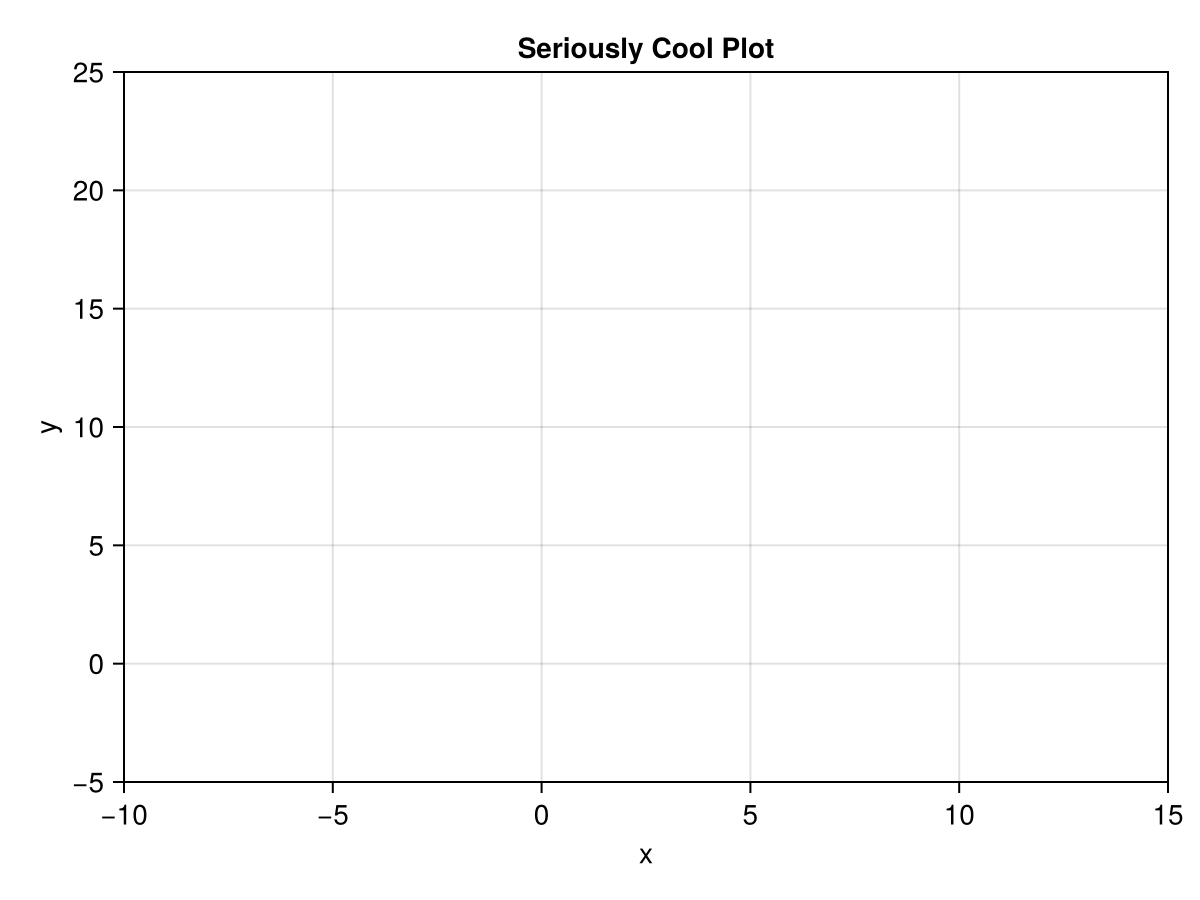

In [23]:
fig = Figure()
ax = Axis(fig[1,1], title="Seriously Cool Plot", xlabel = "x", ylabel = "y", limits = (-10,15,-5,25))
fig

#### Exercise



### 14.4 Adding plots to Axes

Unless a plot is very simple, we generally create a Figure, then an Axis object with the desired properties, then add a plot to it.  Here's the same scatter plot above with some Axis attributes

Note that the `scatter!` is used because we are altering the axis (first argument).  We can also add a function plot (or anything else) with the following:

And then add an additional plot to the existing axes. Let's add $sin(x)$ with `lines!`. 

If we wish to add plots to different axes, here's an example using the axes that we saw above:


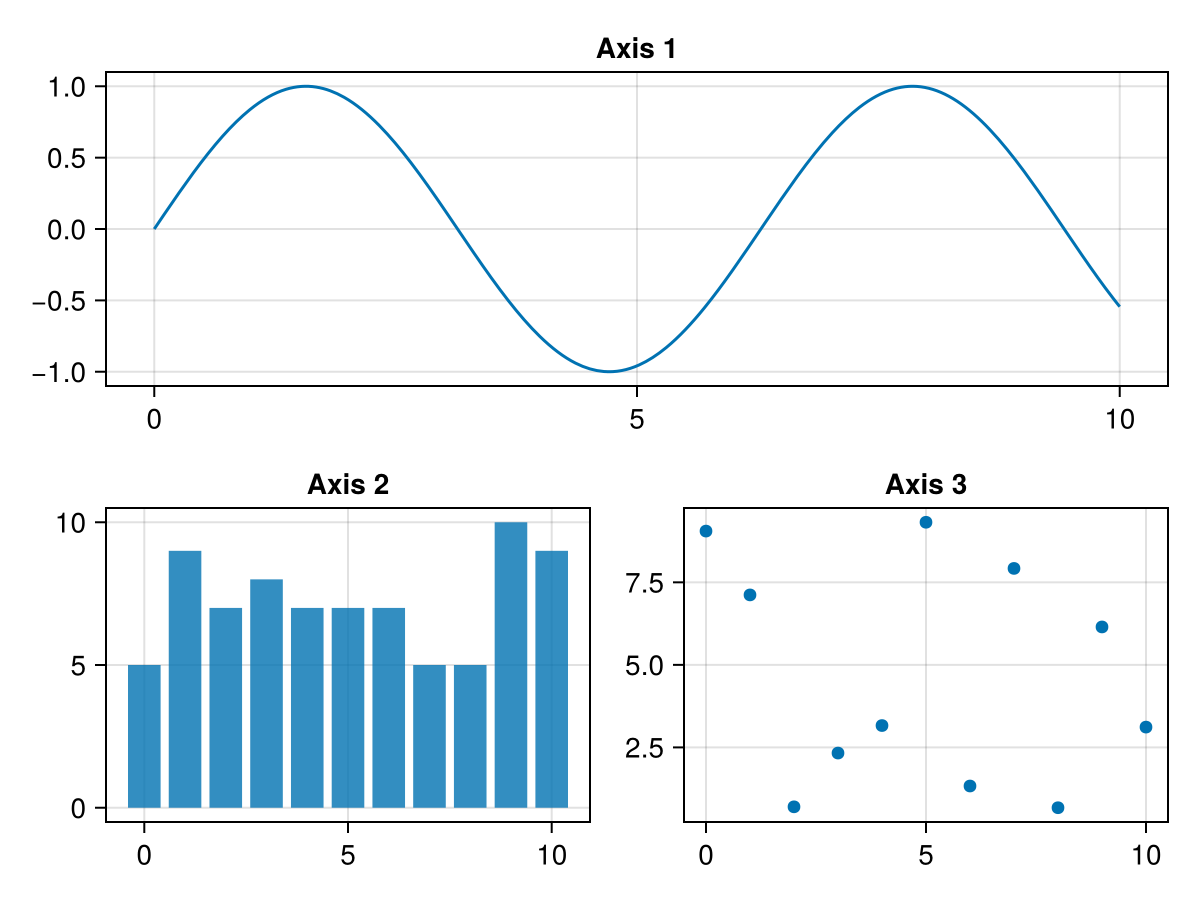

In [30]:
fig = Figure()
ax1 = Axis(fig[1,1], title="Axis 1")
ax2 = Axis(fig[2,1][1,1], title = "Axis 2")
ax3 = Axis(fig[2,1][1,2], title = "Axis 3")
lines!(ax1, 0..10,x -> sin(x))
barplot!(ax2, 0:10, rand(5:10,11))
scatter!(ax3, 0:10, 10*rand(11))
fig

### 14.5 Plotting Data

we'll cover this later in the course

### 14.6 Implicit and Contour Plots

An implicit plot in 2D is the set of points $(x,y)$ that satisfy $f(x,y)=C$, for some function and some constant $C$. The classic example is that of a circle.  The following is relatively complicated to just plot a circle.

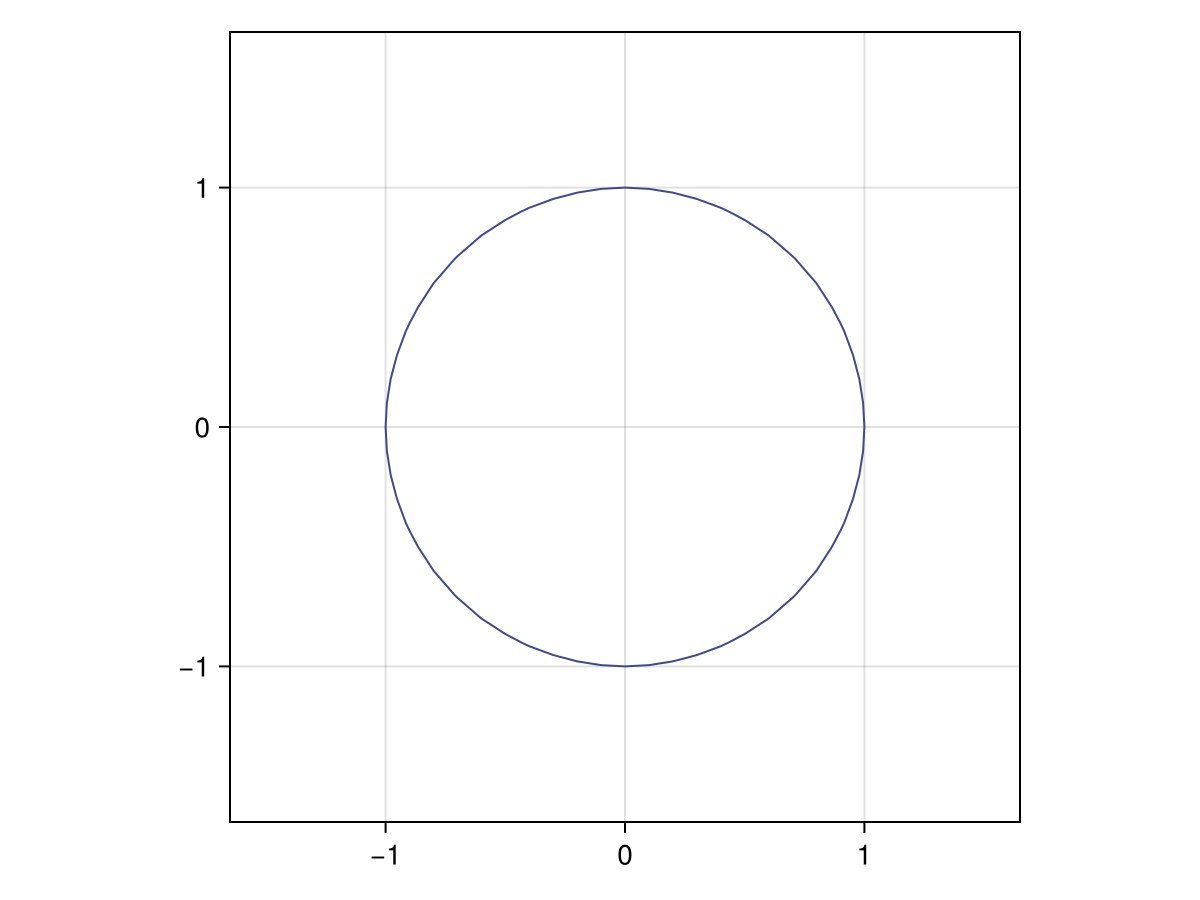

In [40]:
xpts = ypts = -1.5:0.1:1.5
f = [x^2+y^2 for x in xpts, y in ypts ]

fig = Figure()
ax = Axis(fig[1,1], aspect =1)
contour!(ax, xpts, ypts, f, levels=[1])
fig

In [32]:
f

31×31 Matrix{Float64}:
 4.5   4.21  3.94  3.69  3.46  3.25  …  3.25  3.46  3.69  3.94  4.21  4.5
 4.21  3.92  3.65  3.4   3.17  2.96     2.96  3.17  3.4   3.65  3.92  4.21
 3.94  3.65  3.38  3.13  2.9   2.69     2.69  2.9   3.13  3.38  3.65  3.94
 3.69  3.4   3.13  2.88  2.65  2.44     2.44  2.65  2.88  3.13  3.4   3.69
 3.46  3.17  2.9   2.65  2.42  2.21     2.21  2.42  2.65  2.9   3.17  3.46
 3.25  2.96  2.69  2.44  2.21  2.0   …  2.0   2.21  2.44  2.69  2.96  3.25
 3.06  2.77  2.5   2.25  2.02  1.81     1.81  2.02  2.25  2.5   2.77  3.06
 2.89  2.6   2.33  2.08  1.85  1.64     1.64  1.85  2.08  2.33  2.6   2.89
 2.74  2.45  2.18  1.93  1.7   1.49     1.49  1.7   1.93  2.18  2.45  2.74
 2.61  2.32  2.05  1.8   1.57  1.36     1.36  1.57  1.8   2.05  2.32  2.61
 ⋮                             ⋮     ⋱  ⋮                             ⋮
 2.74  2.45  2.18  1.93  1.7   1.49     1.49  1.7   1.93  2.18  2.45  2.74
 2.89  2.6   2.33  2.08  1.85  1.64     1.64  1.85  2.08  2.33  2.6   2.89
 3.06 

We used the `contour!` method above to plot this and set the `levels` attribute to only plot the `C=1` level.  If we remove that and let the levels be determined automatically then:


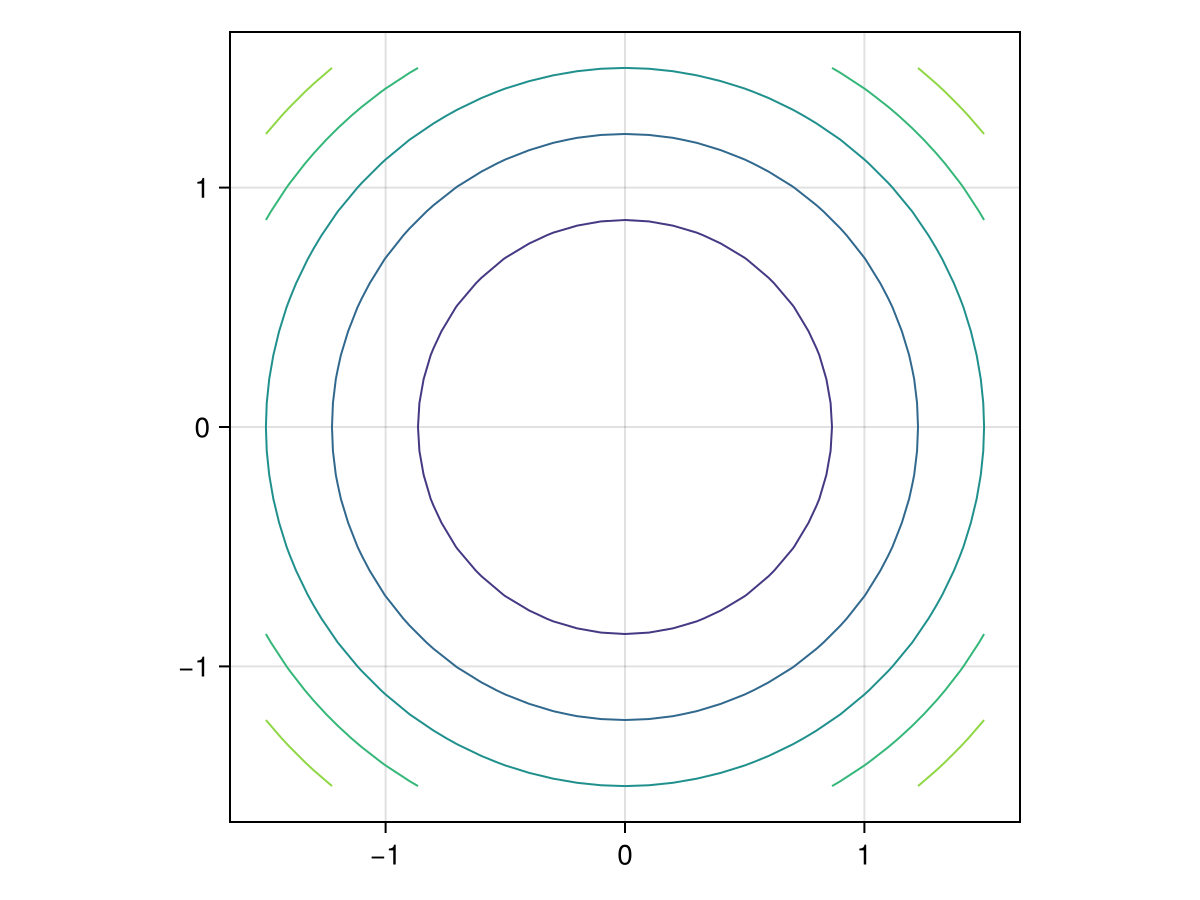

In [41]:
xpts = ypts = -1.5:0.1:1.5
f = [x^2+y^2 for x in xpts, y in ypts ]

fig = Figure()
ax = Axis(fig[1,1], aspect = 1)
contour!(ax, xpts, ypts, f)
fig

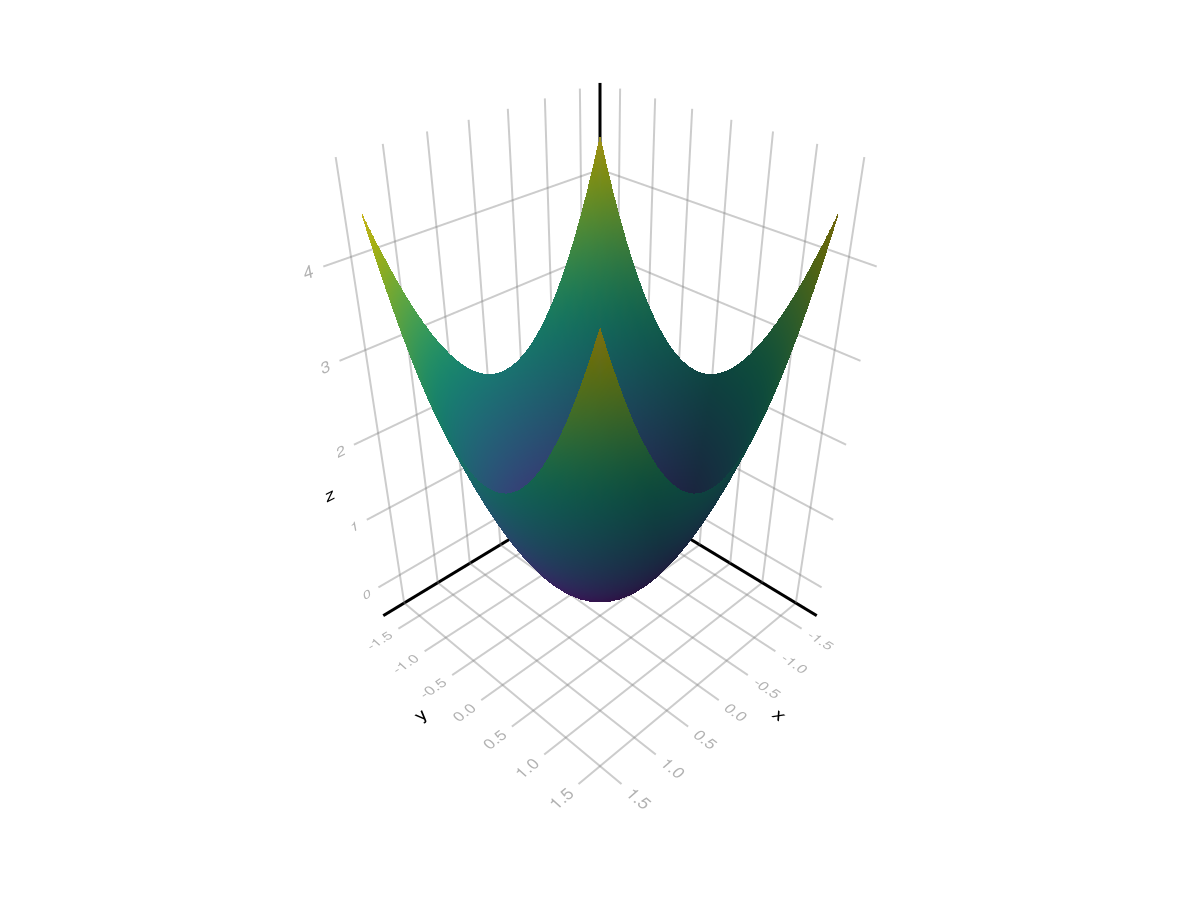

In [42]:
surface(xpts, ypts, f)

### More contour plots

 $$f(x,y) = \sin\left(\frac{1}{2}x^2-\frac{1}{4}y^2+2\right)\cos(x+y)$$

 A basic contour plot has 

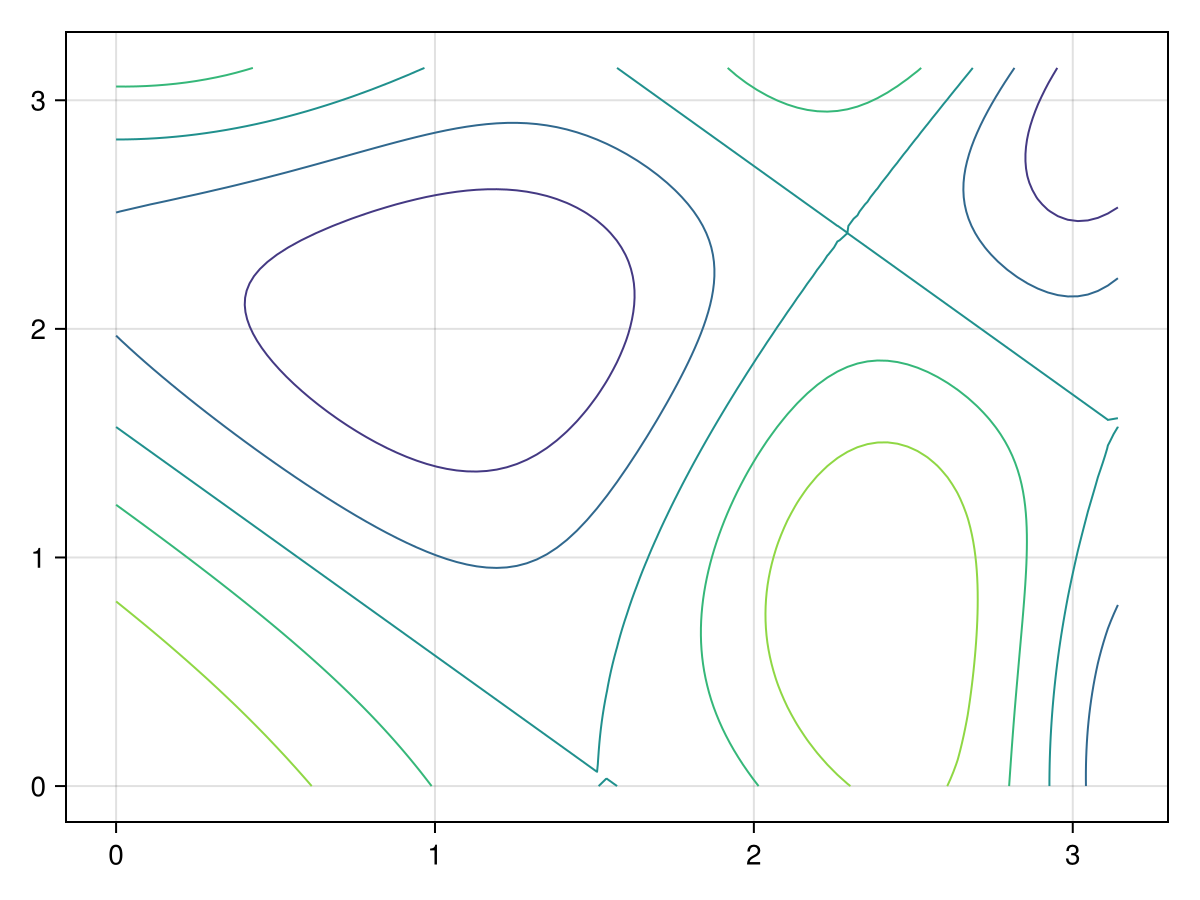

In [43]:
x = y = LinRange(0,pi,101)
g(x,y) = sin(0.5x^2-0.25y^2+2)*cos(x+y)
contour(x,y,g)


Increasing the number of levels and adding labels

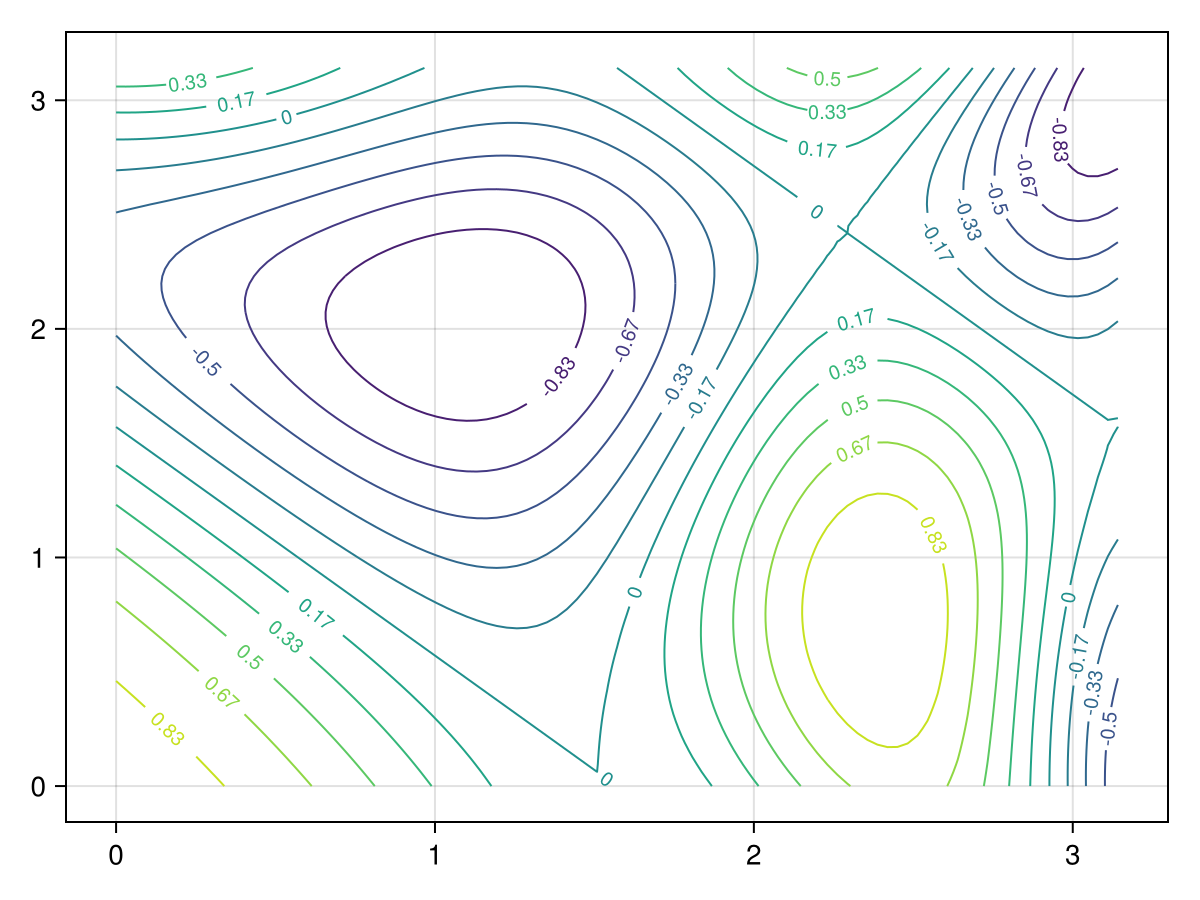

In [44]:
contour(x, y, g, levels = 11, labels = true)

A filled contour plot uses `contourf`

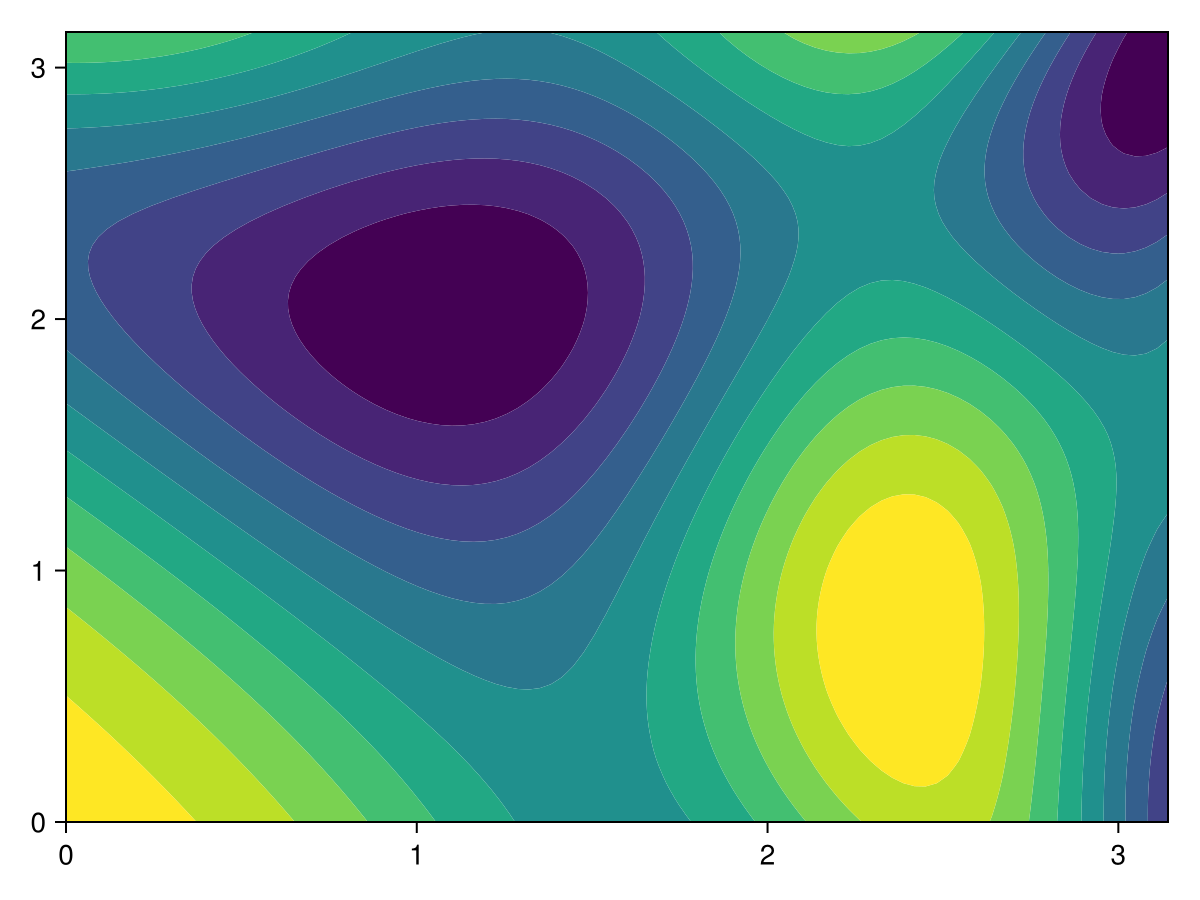

In [45]:
contourf(x, y, g, levels = 11)

And we can add a colorbar to help with the colors:

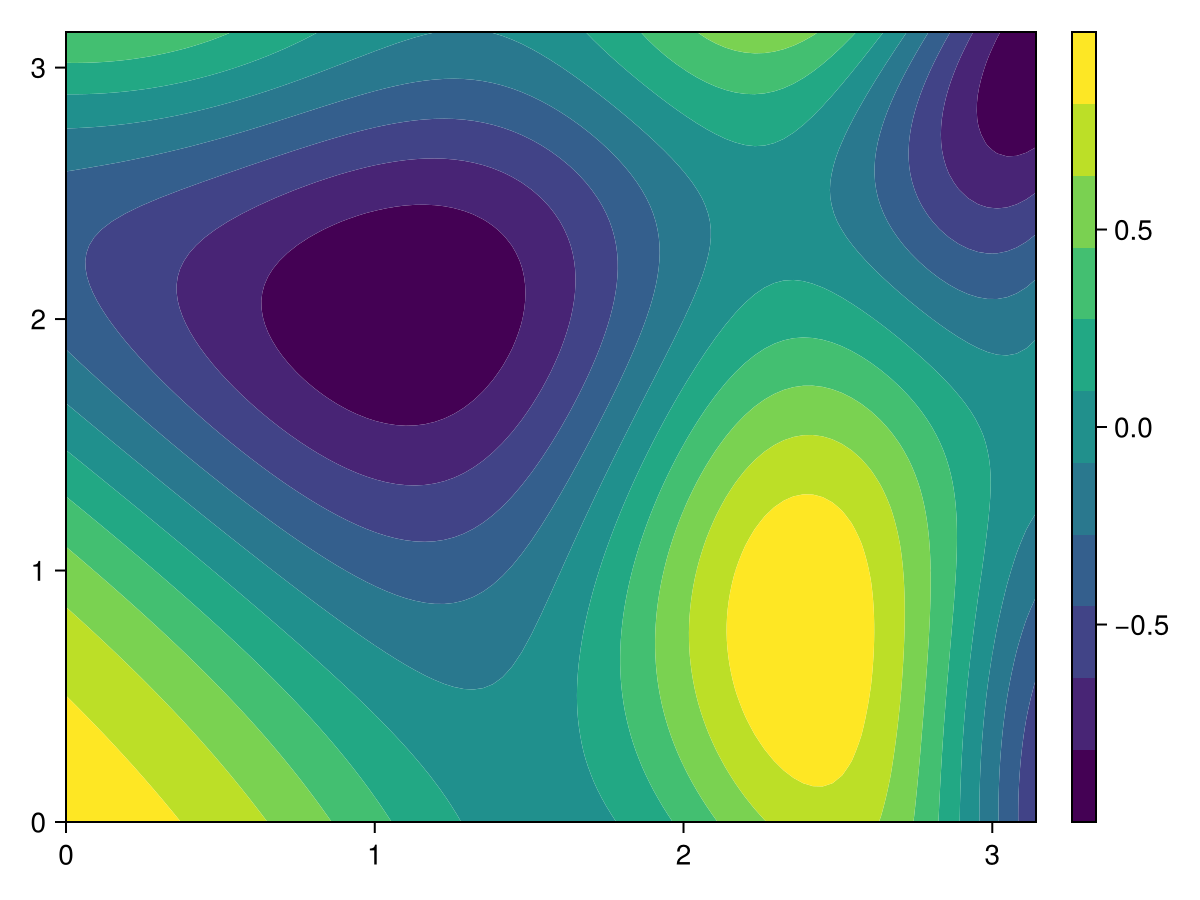

In [46]:

fig, ax, hm = contourf(x, y, g, levels = 11)
Colorbar(fig[1,2], hm)
fig

### Backends for Makie

- **CairoMakie** uses the <c>Cairo</c> drawing engine underneath and excels at high-quality 2D drawings that are non-interactive. The output in generally either an SVG or PDF and since these are vector-based drawing formats, these will produce high-quality graphs for print (and the screen).

- **GLMakie** is the native, desktop-based backend, and is the most feature-complete. It requires an OpenGL enabled graphics card with OpenGL version 3.3 or higher. It appears that almost all graphics cards support OpenGL and thus GLMakie should work for nearly all computers.

- **RPRMakie** is an experimental ray tracing backend using AMDs RadeonProRender. While it's created by AMD and tailored to Radeon GPUs, it still works just as well for NVidia and Intel GPUs using OpenCL. It also works on the CPU and even has a hybrid modus to use GPUs and CPUs in tandem to render images.

- **WGLMakie** is the web-based backend, which is mostly implemented in Julia right now. WGLMakie uses Bonito to generate the HTML and JavaScript for displaying the plots. On the JavaScript side, we use ThreeJS and WebGL to render the plots. Moving more of the implementation to JavaScript is currently the goal and will give us a better JavaScript API, and more interaction without a running Julia server.

### Summary

- To plot using Makie, you need to activate the proper backend and to get plots in VS code do `Makie.inline!(true)`
- Basic plots include `lines` and `scatter`. 
- Makie has a robust subplot layout system.  It's very helpful for complex plots, but necessary to ensure that even simpler plots are laid out correctly.
- Examples of contour and surface plots are shown. 
- There are a ton of other plotting functions on the Makie website. 
- All of the examples here use `CairoMakie`, but there are other backends available.  Feel free to experiment. 

In [47]:
using GLMakie
GLMakie.activate!()
Makie.inline!(false)


false

In [48]:
surface(xpts, ypts, f)